In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 5: Data Analysis

## Textbook References

* [Chapter 8 - Functions and Tables](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html#) 
* [`datascience` Documentation](https://datascience.readthedocs.io/)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [3]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## 🌉 San Francisco City and County Employee Salaries

In this homework assignment, you will combine several of the skills and concepts you've learned so far to analyze [Employee Compensation](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd) data provided by the SF Controller's Office. We have filtered it to retain just the relevant columns and restricted the data to the fiscal year 2022-2023 (July 1, 2022 - June 30, 2023). 

The data stored on your account was pulled from [Employee Compensation page](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd) at `DataSF.gov` using the API endpoint: 

`'https://data.sfgov.org/resource/88g8-5mnd.csv?$limit=1000000&year_type=Fiscal&year=2023'`

Run the following cell to load that data into a table called `sf`.

In [4]:
# API endpoint: https://data.sfgov.org/resource/88g8-5mnd.csv?$limit=1000000&year_type=Fiscal&year=2023
sf = Table.read_table('sf_fy22_23.csv')
sf

organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
4,2800,2846,Fiscal,2023,Community Health,DPH,Public Health,21,"Prof & Tech Eng, Local 21",Public Health,Nutritionist,52846918,68586.6,0,18226.5,86813.1,12782.7,9007.39,6819.16,28609.2,115422
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50859893,147886,2584.28,12881.8,163352,23099.1,16134.5,10227.7,49461.3,212813
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,47356818,0,142.79,0,142.79,0,0,10.95,10.95,153.74
4,2600,2654,Fiscal,2023,Community Health,DPH,Public Health,250,"SEIU, Local 1021, Misc",Dietary & Food,Cook,50850238,86243.6,33036.1,3166.81,122446,16188.5,16796.1,9672.34,42657,165103
4,2300,2322,Fiscal,2023,Community Health,DPH,Public Health,858,"Teamsters, Local 856, Spv RN",Nursing,Nurse Manager,50877316,247150,1140.71,2560,250850,44327.7,20737.9,13821,78886.6,329737
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,52066865,74860.1,16860.9,13643.7,105365,9115.42,8218.37,1798.2,19132,124497
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50850113,192213,19817.7,26600.3,238631,27330.6,21596,10953.1,59879.8,298511
2,1200,1246,Fiscal,2023,"Public Works, Transportation & Commerce",DBI,Building Inspection,22,"Prof & Tech Eng, Local 21",Personnel,Prin Human Resources Analyst,54256822,151894,0,0,151894,27058.7,0,12029.7,39088.4,190983
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50847867,137352,40134.6,5846.1,183332,26232,16683.1,13126.7,56041.8,239374
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50870881,72843.4,2037.07,2311.37,77191.9,13826.2,9196.86,6065.27,29088.3,106280


---

### 📝 Data Notes

* Each line represents an employee's job information such as job family, salary, and benefits.
* The San Francisco Controller's Office  provides [a PDF explaining what each variable means](https://data.sfgov.org/api/views/88g8-5mnd/files/OMBVvreoXRjXG6oP4Ts4497dNxt14XlBqB6uIL6cq-o?download=True&filename=N:\EIS\DataCoordination\Metadata%20Spring%20Cleaning\CON_DataDictionary_Employee-Compensation.pdf).
There are a few interesting details in the data set that are explained in the [Employee Compensation FAQ](https://support.datasf.org/help/employee-compensation-faq)
    * Employees have been given an employee identifier for this data and is not connected to their actual employee identification.
    * An employee can appear on multiple lines
    * Rows may have zero dollar amounts
    * Adjustments to employee's pay can result in negative dollar amounts

---

### 🔔 Table Size Warning

This table has over 40 thousand rows in it. Just loading the data takes up more memory than most of our data sets so far. This means that you want to be careful with creating too many copies of the table since you have a limited amount of memory. We've set up the assignment, so you can complete the tasks with the provided amount of memory, but you may accidentally crash the kernel by running out of memory.

**If your kernel keeps crashing because of running out of memory:**
* Make sure you are only running this notebook and all your other kernels are shut down.
* Talk with a staff member about things you might be doing that utilize a lot of resources.

---

### Task 01 📍

The [Employee Compensation FAQ](https://support.datasf.org/help/employee-compensation-faq) states:
> One employee can appear on multiple lines per year if they changed positions and/or departments mid-year, which happens with some frequency.

This may or may not be true for this particular fiscal year. There are 41,295 rows in the `sf` table. Determine how many unique employee identifiers there are in the `sf` table to see if there are any employees listed more than once. Assign `num_employee_ids` to the number (`int`) of unique employee identifiers in the `sf` table.

*Hint: Consider using the `group` table method.*

_Points:_ 2

In [5]:
num_employee_ids = sf.group("employee_identifier").num_rows
num_employee_ids

41295

In [6]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_employee_ids represents an integer.

---

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

There are a few departments that have a large number of employees. For this task, produce a bar chart that shows the five largest departments in the `sf` table ranked by employee count.

_Points:_ 2

In [7]:
sf.group("department")

department,count
Academy Of Sciences,9
Administrative Services,1145
Adult Probation,147
Airport Commission,1664
Art Commission,56
Asian Art Museum,74
Assessor,186
Board Of Appeals,11
Board Of Supervisors,133
Building Inspection,306


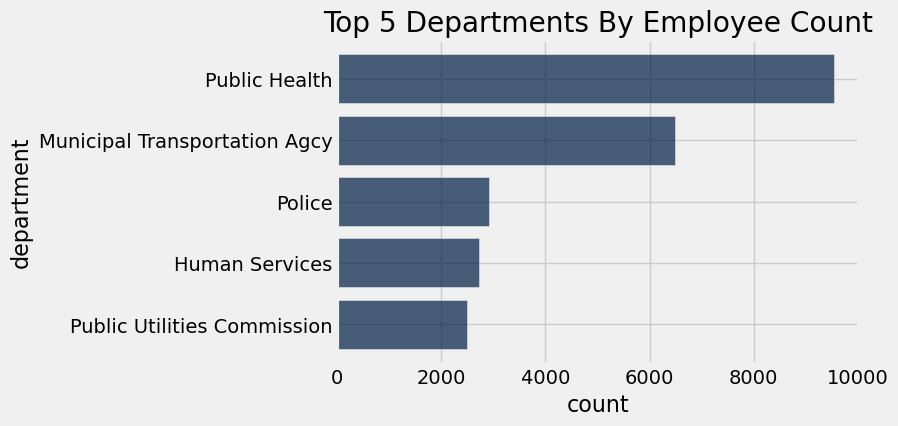

In [8]:
sf.group("department").sort("count", True).take(np.arange(5)).barh("department")

# Leave this to provide a title for your visualization
plt.title('Top 5 Departments By Employee Count')
plt.show()

<!-- END QUESTION -->

---

### Task 03 📍

Some employees for the city and county make a lot of money. Identify the job title that makes the most in terms of total compensation (the sum of salary and benefits).
1. Assign the largest total compensation (a `float` value) to `max_compensation`.
2. Assign the job title (a `str` value) associated with the highest total compensation to the name `max_compensation_position`.

_Points:_ 2

In [9]:
max_compensation = sf.sort("total_compensation", descending=True).column("total_compensation").item(0)
max_compensation_position = sf.sort("total_compensation", descending=True).column("job").item(0)
print(f"The largest total compensation is ${max_compensation:,}")
print(f"The position associated with this compensation is: {max_compensation_position}")

The largest total compensation is $807,199.97
The position associated with this compensation is: Chf Executive & Investment Ofc


In [10]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ max_compensation represents a float.
task_03 - 2 message: ✅ max_compensation_position represents a string.

---

### Task 04 📍🔎

<!-- BEGIN QUESTION -->

Next, summarize the distribution of total compensation values so you can compare that large salary with the salaries of the rest of the employees. Specifically, create a histogram showing the distribution of total compensation.
* Use the `unit = '$'` argument
* Use the default bins.

_Points:_ 2

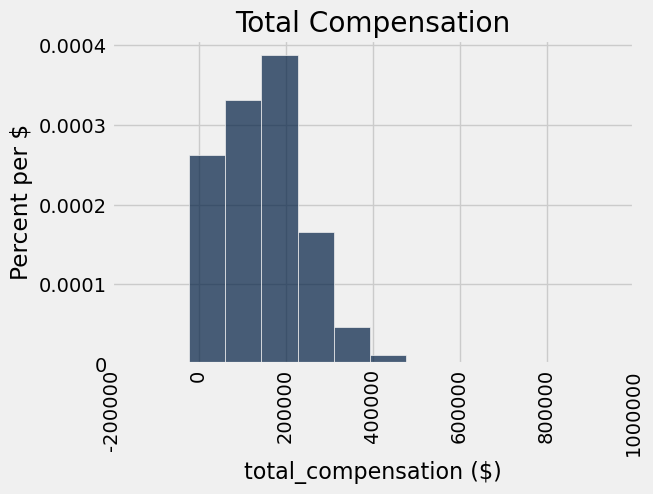

In [11]:
sf.hist("total_compensation", unit = "$")

# Leave this to provide a title for your visualization
plt.title('Total Compensation')
plt.show()

<!-- END QUESTION -->

---

### Task 05 📍🔎

<!-- BEGIN QUESTION -->

In the provided Markdown cell, explain why there seems to be no information visualized on the right side of the histogram created in Task 04. Make sure you connect your response to the `max_compensation` value you calculated.

_Points:_ 2

The max_compensation that is calculated is: $807,199.97, which is also as very little number in the graph, since there is only one number. The graph says that most of the compensations are at the median range, which is between $0 and $400,000, while most of the values are amounted at close to $200,000. This means the maximum compensation or anything else that is close to this value is very minimal.

<!-- END QUESTION -->

---

### Task 06 📍

Your goal for this task is to create a table titled `top_5_departments` featuring two columns: `department` listing department names and `total_compensation median` displaying the median total compensation for each department. Once done, the final table should showcase the 5 departments in the data set with the highest median total compensation values.

_Points:_ 2.5

In [12]:
group_sf_table = sf.group("department", np.median)
group_sf_table

department,organization_group_code median,job_family_code median,job_code median,year_type median,year median,organization_group median,department_code median,union_code median,union median,job_family median,job median,employee_identifier median,salaries median,overtime median,other_salaries median,total_salary median,retirement median,health_and_dental median,other_benefits median,total_benefits median,total_compensation median
Academy Of Sciences,5,,,,2023,,,39,,,,5.08679e+07,115049,11793.8,12404.4,140343,22758.9,18134,10866.6,50094.1,190213
Administrative Services,6,,,,2023,,,790,,,,5.23069e+07,84791.9,0,46.8,91987.8,15290.4,16263.4,7100.43,38144.5,128375
Adult Probation,1,,,,2023,,,651,,,,5.20968e+07,118306,0,0,121340,23062.1,18226.2,2032.66,44044,168317
Airport Commission,2,,,,2023,,,351,,,,5.10065e+07,89459.2,428.415,1165.57,98160.1,16566.9,16602.3,7590.86,39830.9,138155
Art Commission,5,,,,2023,,,790,,,,5.23469e+07,85770.6,0,0,85796.1,14648.9,13572.4,6555.31,33824.1,114001
Asian Art Museum,5,,,,2023,,,790,,,,5.08771e+07,73885.1,177.355,61.855,79078.6,13790.8,15521.8,6240.57,34956.5,114650
Assessor,6,,,,2023,,,21,,,,5.27319e+07,114159,0,480,114842,20994,16263.4,8728.89,45330.9,160756
Board Of Appeals,2,,,,2023,,,323,,,,5.13965e+07,1875,0,0,1875,0,0,142.41,150.29,2325.29
Board Of Supervisors,6,,,,2023,,,22,,,,5.1287e+07,96519.3,0,0,98357.3,17183.4,13737.8,7542.97,37250.8,136834
Building Inspection,2,,,,2023,,,790,,,,5.28475e+07,142927,0,1006.45,145341,26089.1,16789.1,10967,52711.8,195918


In [13]:
group_sf_table.select("department", "total_compensation median")

department,total_compensation median
Academy Of Sciences,190213
Administrative Services,128375
Adult Probation,168317
Airport Commission,138155
Art Commission,114001
Asian Art Museum,114650
Assessor,160756
Board Of Appeals,2325.29
Board Of Supervisors,136834
Building Inspection,195918


In [14]:
group_sf_table.select("department", "total_compensation median").sort("total_compensation median",descending=True)

department,total_compensation median
Law Library,258800
Fire Department,235598
Sheriff,230050
City Attorney,227537
Police,225890
Dept of Emergency Management,199403
Building Inspection,195918
Department of Technology,192201
Academy Of Sciences,190213
Public Defender,185809


In [15]:
top_5_departments = group_sf_table.select("department", "total_compensation median").sort("total_compensation median",descending=True).take(np.arange(5))
top_5_departments

department,total_compensation median
Law Library,258800
Fire Department,235598
Sheriff,230050
City Attorney,227537
Police,225890


In [16]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ top_5_departments is a Table.
task_06 - 2 message: ✅ top_5_departments has the correct number of rows and columns

---

### Task 07 📍

Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where the range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**.

Keep in mind the following while working on this:

* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.
* What table function allows you to specify the rows and columns of a new table?


_Points:_ 2

In [17]:
# Define compensation_range first
def compensation_range(array):
    return max(array)-min(array)


department_ranges = sf.pivot("organization_group","department","total_compensation",compensation_range)
department_ranges

department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,177132,0,0,0,0
Administrative Services,0,0,513149,0,0,0
Adult Probation,0,0,0,0,445079,0
Airport Commission,0,0,0,0,0,506447
Art Commission,0,291648,0,0,0,0
Asian Art Museum,0,338984,0,0,0,0
Assessor,0,0,320890,0,0,0
Board Of Appeals,0,0,0,0,0,278601
Board Of Supervisors,0,0,334616,0,0,0
Building Inspection,0,0,0,0,0,368399


In [18]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your function compensation_range seems to be working correctly.
task_07 - 2 message: ✅ You have the correct column labels in department_ranges.
task_07 - 3 message: ✅ The values in one of the columns of department_ranges seem correct.

---

Which department has the longest job title? There are a few ways you might answer this, but we are going to guide you in one way that gives you practice making and using functions with the `group` method. 

Before you go on to the next task, run the following code cell to define a function that takes a list or array of strings and returns an array of the lengths of those strings. You don't have to understand how the code works, but this might give you an idea of where error messages come from. You should try it out with a few lists/arrays of strings to see what it is doing.

In [19]:
def string_lengths(strings):
    '''
    Returns an array that contains the length of each string in the array or list called strings.

    Example
    --------
    >>> string_lengths(['a', 'an', 'the'])
    array([1, 2, 3])
    '''
    
    if not isinstance(strings, (list, np.ndarray)):
        raise ValueError("Input must be a list or array")

    if len(strings) == 0:
        return np.array([0])
    
    for s in strings:
        if not isinstance(s, str):
            raise ValueError("Input must contain only strings")
        
    return np.array([len(s) for s in strings])

In [20]:
# Try calling the function
an_array_of_strings = make_array('City', 'College', 'of', 'San Francisco')
string_lengths(an_array_of_strings)

array([ 4,  7,  2, 13])

Notice that it provides the length of the 4 strings that were provided in the input array. Remember that `len` does count the blank space in `'San Francisco'`.

---

### Task 08 📍

Define a function called `max_job_name` that returns the length of the longest job name from an array or list of job names (strings).

* **Hint:** Use the `string_lengths` function above. 
* **Hint:** `max_job_name(['Electrician', 'Analyst', 'Social Worker'])` should return `13` because `'Social Worker'` is the longest string with 13 characters (including the space).
* **Hint:** You can assume the list of jobs is not empty because every department in the `sf` table has at least 1 job. 

_Points:_ 3

In [21]:
def max_job_name(a_array):
    return max(string_lengths(a_array))


# Try out the function
max_job_name(['Electrician', 'Analyst', 'Social Worker'])

13

In [22]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ max_job_name is callable.
task_08 - 2 message: ✅ max_job_name seems to be working.

---

### Task 09 📍

What are the lengths of the longest job names for each department?

Create a table called `departments` that shows a row for each unique department name in the `sf` table and the length of the longest job name within that department. A few things to consider when making your final table:

* Sort the table so that the department(s) with the longest job name are at the top of the table.
* The columns should be `'department'` and `'max_job_name_length'`.

**Hint:** Try out the `max_job_name` function you just made!

_Points:_ 2

In [23]:
departments = sf.select('department','job').group('department', collect=max_job_name).relabeled('job max_job_name', 'max_job_name_length')
departments

department,max_job_name_length
Academy Of Sciences,26
Administrative Services,30
Adult Probation,30
Airport Commission,30
Art Commission,29
Asian Art Museum,30
Assessor,30
Board Of Appeals,26
Board Of Supervisors,30
Building Inspection,30


In [24]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ departments is a table (or department is a string).

---

California has laws in place to help govern how much an employee should be paid for overtime work. Visit the [Labor Commissioner's Office FAQ about Overtime](https://www.dir.ca.gov/dlse/faq_overtime.htm) if you are curious about these laws. There could be several reasons for why an employee works overtime. Some are healthy reasons and some are not. The ratio of overtime compensation to total compensation can provide a signal for health of departments and their employees. According to [Indeed.com](https://www.indeed.com/career-advice/career-development/working-overtime), here are some potential disadvantages of working extra hours:

> **Focus loss**: You will likely want to take breaks while working overtime, and you may lose focus and productivity naturally as your working hours increase. 
> 
> **Safety and health risk**: Working longer hours also can be dangerous, depending on the job. Working overtime regularly can also disrupt your work-life balance, lead to burnout or create health risks, such as sitting at a computer for long periods. Due to these risks, more companies are limiting the number of hours worked in certain positions, such as truck drivers. 
> 
> **Less work-life balance**: There are only 24 hours in the day, and working overtime reduces the time for a good work-life balance. More work hours mean fewer hours for family, relaxation and sleep.

On the other hand, here are some potential advantages for working extra hours:

> **Extra money**: Working overtime means you earn extra money for extra hours, usually 1.5 to two times your hourly rate. Overtime pay could allow you to bulk up your salary and have more money for living expenses, vacations or savings. 
>
>**Career boost**: Working overtime may also help advance your career—and potential earnings—by proving you’re reliable and motivated in your role. Volunteering to work extra hours shows your current employer that you’re dedicated to doing a good job. 
>
>**Gain experience**: Overtime is an opportunity to gain job experience and polish your skills. Typically, the more you work at something, the better you become.

One way to analyze overtime work for San Francisco employees is to consider the overtime pay values in the data set, but these values are relative to the amount of money the employee makes. To account for this you could consider overtime pay for an employee as a quantity relative to that employee's salary. This would allow you to compare these ratios for all the employees. Specifically, use the measurement called the overtime ratio defined as:

$$\text{Overtime Ratio} = \frac{\text{Overtime Pay}}{\text{Salary}}$$

There are many special cases, when it comes to overtime pay, that might make analyzing this ratio in general challenging. So, to keep things more simple, narrow your focus to employees that make at least a certain salary. Let that base salary reflect working 40 hrs per week for 52 weeks at the minimum wage of the time, 16.99 dollars per hour.

---

### Task 10 📍

For this task, create a table called `sf_above_35k` that contains the same information in the `sf` table and overtime ratios for employees making above $35,000. Make sure that `sf_above_35k` has:
 * Only employees from the `sf` table that have salaries above 35,000 dollars AND
 * The same columns as the `sf` table with an additional column `overtime_ratio` containing the overtime ratios from the above formula.

_Points:_ 2.5

In [25]:
sf_above_35k_only = sf.where("salaries",are.above(35000))

overtime_ratios = sf_above_35k_only.column("overtime") / sf_above_35k_only.column("salaries")

sf_above_35k = sf_above_35k_only.with_column("overtime_ratio",overtime_ratios)
sf_above_35k

organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation,overtime_ratio
4,2800,2846,Fiscal,2023,Community Health,DPH,Public Health,21,"Prof & Tech Eng, Local 21",Public Health,Nutritionist,52846918,68586.6,0,18226.5,86813.1,12782.7,9007.39,6819.16,28609.2,115422,0
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50859893,147886,2584.28,12881.8,163352,23099.1,16134.5,10227.7,49461.3,212813,0.0174748
4,2600,2654,Fiscal,2023,Community Health,DPH,Public Health,250,"SEIU, Local 1021, Misc",Dietary & Food,Cook,50850238,86243.6,33036.1,3166.81,122446,16188.5,16796.1,9672.34,42657,165103,0.383055
4,2300,2322,Fiscal,2023,Community Health,DPH,Public Health,858,"Teamsters, Local 856, Spv RN",Nursing,Nurse Manager,50877316,247150,1140.71,2560,250850,44327.7,20737.9,13821,78886.6,329737,0.00461546
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,52066865,74860.1,16860.9,13643.7,105365,9115.42,8218.37,1798.2,19132,124497,0.225232
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50850113,192213,19817.7,26600.3,238631,27330.6,21596,10953.1,59879.8,298511,0.103103
2,1200,1246,Fiscal,2023,"Public Works, Transportation & Commerce",DBI,Building Inspection,22,"Prof & Tech Eng, Local 21",Personnel,Prin Human Resources Analyst,54256822,151894,0,0,151894,27058.7,0,12029.7,39088.4,190983,0
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50847867,137352,40134.6,5846.1,183332,26232,16683.1,13126.7,56041.8,239374,0.292204
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50870881,72843.4,2037.07,2311.37,77191.9,13826.2,9196.86,6065.27,29088.3,106280,0.0279651
4,2300,P103,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Special Nurse,53726867,47504.3,4262.5,9470.9,61237.7,0,0,4024.48,4024.48,65262.2,0.0897287


In [26]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ sf_above_35k is a Table.
task_10 - 2 message: ✅ sf_above_35k has the correct number of columns.

---

### Task 11 📍🔎

<!-- BEGIN QUESTION -->

Is overtime collected similarly over the various salaries in the `sf_above_35k` table? See if there is any relationship between salary and the overtime ratios. For this task, create a visualization showing the relationship between salary and overtime ratio values for employees who make above $35,000.

_Points:_ 2

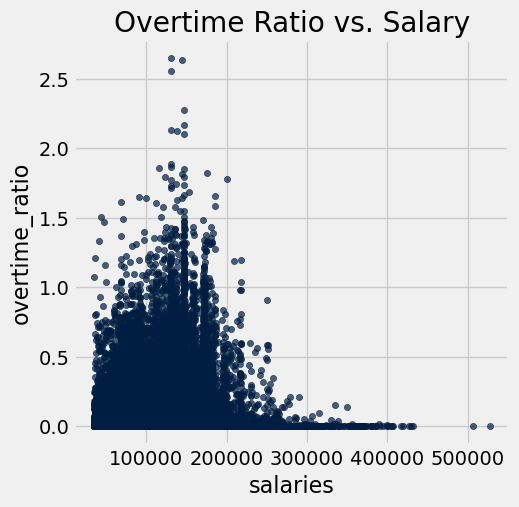

In [27]:
sf_above_35k.scatter("salaries", "overtime_ratio")


# Leave this to provide a title for your visualization
plt.title('Overtime Ratio vs. Salary')
plt.show()

<!-- END QUESTION -->

---

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

In the provided Markdown cell, summarize the relationship you see based on the visualization and provide at least one idea for why you are seeing the pattern you are seeing.

_Points:_ 2

Where the median salaries is, or the average, the people earning the salaries on average (and most likely, the most people working in the similar salary range, and also the job likely having the most people working in the similar tasks), are working the most, having the highest overtime ratio.

<!-- END QUESTION -->

There are many things you can explore in this data set, but that is enough for now!

---

## 🏈 2023-24 CCSF Football Season

You are going to analyze how well the CCSF football team performed in the 2023-24 season. A football game is divided into four periods, called quarters. The number of points CCSF scored in each quarter (e.g. `CCSF 1Q`), and the number of points their opponent scored in each quarter  (e.g. `Opp 1Q`) are stored in a table called `games`. If the game is tied at the end of the 4th quarter, the game goes into an additional period called overtime.

**Notes**:
* The 2023-24 season data was collected using the Game Log from [the CCSF Athletics website](https://ccsfathletics.com/sports/fball/2023-24/teams/sanfrancisco?view=gamelog).
* The table `games_full` contains dditional statistics at the right end of the table for your curiosity.
* A `nan` value indicates that no data was provided on the website.

In [28]:
games_full = Table().read_table("ccsf_fb.csv")
games = games_full.select(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
games.show()

Opponent,CCSF 1Q,CCSF 2Q,CCSF 3Q,CCSF 4Q,CCSF OT,Opp 1Q,Opp 2Q,Opp 3Q,Opp 4Q,Opp OT
Santa Rosa,13,21,3,21,0,0,0,0,14,0
Sacramento City,0,3,14,7,0,3,0,0,0,0
Butte,0,7,20,0,0,9,0,0,6,0
Fresno,0,21,10,14,0,3,7,0,14,0
Sierra,14,14,14,7,0,7,14,14,0,0
San Joaquin Delta,7,27,7,22,0,0,3,0,0,0
Laney,7,17,7,7,0,0,0,0,15,0
Diablo Valley,14,29,0,13,0,0,0,0,0,0
Chabot,7,21,21,10,0,0,0,6,0,0
San Mateo,10,0,0,7,0,14,0,14,16,0


Let's start by finding the total points each team scored in a game.

---

### Task 13 📍

Write a function called `sum_scores`.  It should take five arguments, where each argument is the team's quarter or overtime score. It should return the team's total score for that game.

_Points:_ 2

In [29]:
def sum_scores(q1, q2, q3, q4, ot):
    """Returns the total score calculated by adding up the score of each quarter and the overtime"""
    total_score = q1 + q2 + q3 + q4 + ot
    return total_score

sum_scores(14, 7, 3, 0, 3) #DO NOT CHANGE THIS LINE

27

In [30]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ Your function works with our 4 quarter scores and over time score.

---

### Task 14 📍

Create a new table `final_scores` with three columns in this *specific* order: `Opponent`, `CCSF Score`, `Opponent Score`. You will have to create the `CCSF Score` and `Opponent Score` columns. Use the function `sum_scores` you just defined in the previous question for this problem.

*Hint:* If you want to apply a function that takes in multiple arguments, you can pass multiple column names as arguments in `tbl.apply()`. The column values will be passed into the corresponding arguments of the function. Take a look at the python reference for syntax.

*Tip:* If you’re running into issues creating final_scores, check that `ccsf_scores` and `opponent_scores` output what you want. Also, you will more than likely want to create more steps/intermediate variables.



_Points:_ 3

In [31]:
CCSFScore = games.apply(sum_scores,"CCSF 1Q", "CCSF 2Q","CCSF 3Q", "CCSF 4Q", "CCSF OT")
OpponentScore = games.apply(sum_scores,"Opp 1Q", "Opp 2Q","Opp 3Q", "Opp 4Q", "Opp OT")

final_scores = games.select("Opponent").with_columns("CCSF Score", CCSFScore, "Opponent Score", OpponentScore)
final_scores

Opponent,CCSF Score,Opponent Score
Santa Rosa,58,14
Sacramento City,24,3
Butte,27,15
Fresno,45,24
Sierra,49,35
San Joaquin Delta,63,3
Laney,38,15
Diablo Valley,56,0
Chabot,59,6
San Mateo,17,44


In [32]:
grader.check("task_14")

task_14 results: All test cases passed!
task_14 - 1 message: ✅ final_scores has the correct number of columns.
task_14 - 2 message: ✅ final_scores has the correct labels.

We can get specific row objects from a table. You can use `tbl.row(n)` to get the `(n+1)`th row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row. Here's an example:

In [33]:
# Just run this cell
games.row(10)

Row(Opponent='American River', CCSF 1Q=0, CCSF 2Q=0, CCSF 3Q=6, CCSF 4Q=0, CCSF OT=0, Opp 1Q=14, Opp 2Q=10, Opp 3Q=3, Opp 4Q=14, Opp OT=0)

In [34]:
# Just run this cell
games.row(10).item("CCSF 4Q")

0

---

### Task 15 📍

We want to see for a particular game whether or not CCSF won. Write a function called `did_ccsf_win`.  It should take one argument: a **row object** from the `final_scores` table. It should return either `True` if CCSF's score was greater than the Opponent's score, and `False` otherwise.

*Note 1*: "Row object" means a row from the table extracted (behind the scenes) using `tbl.row(index)` that contains all the data for that specific row. It is **not** the index of a row. Do not try and call `final_scores.row(row)` inside of the function.

*Note 2*: If you're still confused by row objects, try printing out `final_scores.row(1)` in a new cell to visually see what it looks like! This piece of code is pulling out the row object located at index 1 of the `final_scores` table and returning it. When you display it in a cell, you'll see that it is not located within a table, but is instead a standalone row object!




_Points:_ 3

In [35]:
def did_ccsf_win(row):
    ccsf_score = row.item('CCSF Score')
    opponent_score = row.item('Opponent Score')
    if ccsf_score > opponent_score:
        return True
    else:
        return False
    return ccsf_score > opponent_score

In [36]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ You've created a function called did_ccsf_win.
task_15 - 2 message: ✅ Your function shows that CCSF won against Sacramento City.

---

### Task 16 📍

Unfortunately, CCSF did not win against every opponent during the 2023-24 season. Using the `final_scores` table, assign `results` to an array of `True` and `False` values that correspond to whether or not CCSF won. Add the `results` array to the `final_scores` table, and assign this to `final_scores_with_results`. Then, respectively assign the number of wins and losses CCSF had to `ccsf_wins` and `ccsf_losses`.

*Hint*: When you only pass a function name and no column labels through `tbl.apply()`, the function gets applied to every row in `tbl`



_Points:_ 2

In [37]:
results = final_scores.apply(did_ccsf_win)
final_scores_with_results = final_scores.with_columns("Results", results)
ccsf_wins = np.count_nonzero(final_scores_with_results.column("Results"))
ccsf_losses = final_scores_with_results.num_rows-ccsf_wins

# Don't delete or edit the following line:
print(f"In the 2023-24 Season, CCSF Football won {ccsf_wins} games and lost {ccsf_losses} games. Go RAMS!")

In the 2023-24 Season, CCSF Football won 9 games and lost 2 games. Go RAMS!


In [38]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ ccsf_wins is a possible value
task_16 - 2 message: ✅ ccsf_losses is a possible value

---

### Task 17 📍

Sometimes in football, the two teams are equally matched and the game is quite close. Other times, it is a blowout, where the winning team wins by a large margin of victory. Let's define a **big win** to be a game in which the winning team won by more than 10 points. 

Create a function called `is_big_win`.
* The function should accept a single row (`datascience.tables.Row` data type) from a table like the `final_scores` table.
* The function should output `True` if CCSF won by **more than** 10 points. Otherwise, it should return `False`.

Test your function on the first row of the table. `final_scores.row(0)` should be the row object `Row(Opponent='Santa Rosa', CCSF Score=58, Opponent Score=14)`. Since CCSF's score is more than 10 points larger than Santa Rosa's score, then `is_big_win` applied to that row should output `True`.

_Points:_ 3

In [39]:
def is_big_win(row):
    return (row.item("CCSF Score")-row.item("Opponent Score"))>10


# Test your function 
row1 = final_scores.row(0)
is_big_win(row1)

True

In [40]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ It seems like you defined a function called is_big_win.
task_17 - 2 message: ✅ Your function produces the correct output for the first row of final_scores.

---

### Task 18 📍

Use your `final_scores` table with your `is_big_win` function to assign `big_wins` to an array of team names that CCSF had big wins against during the 2023-24 football season.

_Points:_ 2.5

In [41]:
big_wins = make_array()

for row_index in np.arange(final_scores.num_rows):
    row = final_scores.row(row_index)
    opponent = row.item(0)
    if is_big_win(row):
        big_wins = np.append(big_wins, opponent)

big_wins

array(['Santa Rosa', 'Sacramento City', 'Butte', 'Fresno', 'Sierra',
       'San Joaquin Delta', 'Laney', 'Diablo Valley', 'Chabot'],
      dtype='<U32')

In [42]:
grader.check("task_18")

task_18 results: All test cases passed!
task_18 - 1 message: ✅ big_wins is a NumPy array.
task_18 - 2 message: ✅ The first item in big_wins is a string.
task_18 - 3 message: ✅ There is a possible value for the number items in big_wins.

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()